© 2018 Suzy Beeler. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT) 

This exercise was generated from a Jupyter notebook. You can download the notebook [here](genetic_drift.ipynb).
___

# Objective 

Here we will simulate the famous Buri experiment, where we will track the allele frequencies of small populations over time. This tutorial illustrates the role that genetic drift plays in evolution **in the absence of selection**.

In [3]:
# Import the necessary modules
import numpy as np
import matplotlib.pyplot as plt

# For pretty plots
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14, \
    'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
sns.set(rc=rc)

# Buri experiment, bag of alleles treatment

In [8]:
# number of vials 
n_vials = 10000

# number of flies in each vial
n_flies = 16

In [9]:
# array to store time to fixation
time_to_fix1 = np.zeros(n_vials)

# loop through number of vials
for v in range(n_vials):
    
    # start generation counter
    gen_count = 0
    
    # initial red frequency
    old_red_freq = 0.5
    
    # loop until fixation
    while True:
        
        # simulate mating for the next generation
        # 0 is white allele, 1 is red allele 
        new_alleles = np.random.choice([0,1], size=n_flies*2, 
                                       p=[1-old_red_freq, old_red_freq])
        
        # calculate new red allele frequence
        new_red_freq = sum(new_alleles) / len(new_alleles)
        
        # see if fixation has occurred
        if (new_red_freq == 0) or (new_red_freq == 1):
            time_to_fix1[v] = gen_count
            break # exit loop
            
        # update generation count
        gen_count += 1
        
        # update red frequency
        old_red_freq = new_red_freq

Text(0,0.5,'frequency')

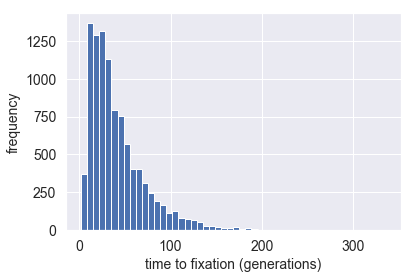

In [24]:
plt.hist(time_to_fix1, bins=50);
plt.xlabel("time to fixation (generations)")
plt.ylabel("frequency")

# Buri experiment, 16 flies treatment

This version prevents two alleles from being drawn from the same fly for the next generation.

In [13]:
def next_gen(vial):
    """
    Given a vial (an array of sixteen flies that are [0,0], [0,1], or [0,1]),
    produces a new vial of 16 flies. 
    """
 
    # new vial to populate
    new_vial = []

    # loop through the 16 new flies to be made
    for i in range(len(vial)):
        
        # pick two flies to mate from vial. NO replacement allowed
        flies_to_mate = np.random.choice(np.arange(len(vial)), size=2, replace=False)
        
        # new genotype to be specified
        new_genotype = []

        # from each fly, grab one allele and add to new genotype
        for fly in flies_to_mate:
            allele = np.random.choice(vial[fly])
            new_genotype.append(allele)

        # add new genotype to new vial
        new_vial.append(new_genotype)
    
    return np.array(new_vial)

In [15]:
# array to store time to fixation
time_to_fix2 = np.zeros(n_vials)

# loop through number of vials
for v in range(n_vials):
    
    # what a vial looks like to start 
    # HARDCODED for 16 flies
    vial = np.array([[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],
                     [0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]])
    
    # start generation count
    gen_count = 0
    
    # loop  through number of generations
    while True:
        
        # simulate mating
        new_vial = next_gen(vial)
        
        # compute new red allele frequency
        new_red_freq = np.sum(new_vial.flatten()) / (2*n_flies)
        
        # see if fixation has occurred
        if (new_red_freq == 0) or (new_red_freq == 1):
            time_to_fix2[v] = gen_count
            break # exit loop
            
        # update generation count
        gen_count += 1
            
        # update vial
        vial = new_vial

Text(0,0.5,'frequency')

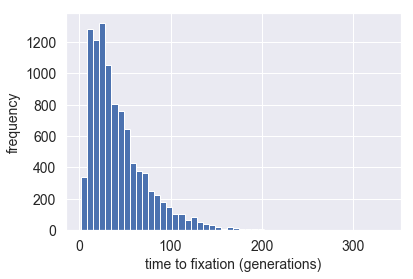

In [16]:
plt.hist(time_to_fix2, bins=50);
plt.xlabel("time to fixation (generations)")
plt.ylabel("frequency")

# Compare the two approaches

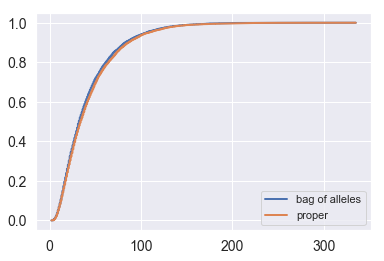

In [25]:
# sort the final times to fixation
sorted1 = np.sort(time_to_fix1)
sorted2 = np.sort(time_to_fix2)

# make the corresponding y_values for ECDF
y_values = np.linspace(start=0, stop=1, num=n_vials)

# plot
plt.plot(sorted1, y_values)
plt.plot(sorted2, y_values)
plt.legend(["bag of alleles","proper treatment"])

They don't look too different, but let's zoom in:

(0, 100)

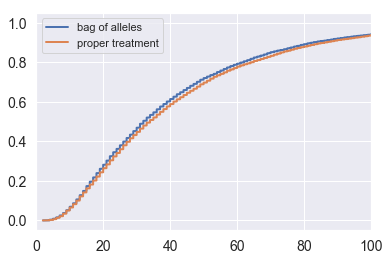

In [26]:
# plot
plt.plot(sorted1, y_values)
plt.plot(sorted2, y_values)
plt.legend(["bag of alleles","proper treatment"])
plt.xlim([0,100])

If anything, the "bag of alleles" treatment fixes earlier on average, but the effect is slight:

In [38]:
print("Bag of alleles mean time to fixation:", np.mean(sorted1), "generations")
print("Proper treatment mean time to fixation:", np.mean(sorted2), "generations")
print()
print("Bag of alleles median time to fixation:", np.median(sorted1), "generations")
print("Proper treatment median time to fixation:", np.median(sorted2), "generations")

Bag of alleles mean time to fixation: 41.4857 generations
Proper treatment mean time to fixation: 43.2232 generations

Bag of alleles median time to fixation: 32.0 generations
Proper treatment median time to fixation: 34.0 generations
